#### ASSIGNMENT 2
1) Given N=2, write the density matrix of a general pure state Ψ, 𝜌 = |Ψ⟩⟨Ψ|

2) Given a generic density matrix of dimension 𝐷^𝑁 x 𝐷^𝑁 compute the reduced density matrix of
either the left or the right system, e.g. 𝜌1 = Tr2𝜌.

3) __Test the functions described before (and all others needed) on two-spin one-half (qubits) with different states__


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import norm
from qiskit.visualization import plot_bloch_vector

from N_body_density import density_matrix, get_reduced_density_matrix 
from N_body_wfc import generate_Nbody_wfc, Nbody_separable_wfc, normalize_vector
from qubit_module import density_matrix_pauli, qubit_bloch_vector, expectation_value,state_purity, get_reduced_density_matrix_from_density_matrix
import debugger_module as dbg 

debug=True

N=2
D=2

## SINGLE QUBIT EXAMPLES

In [2]:
state_0 = [0,1]
state_1 = [1,0]

psi = (1/np.sqrt(2)) * (np.array(state_0) + (np.array(state_1)))
psi

array([0.70710678, 0.70710678])

[[0.5 0.5]
 [0.5 0.5]]


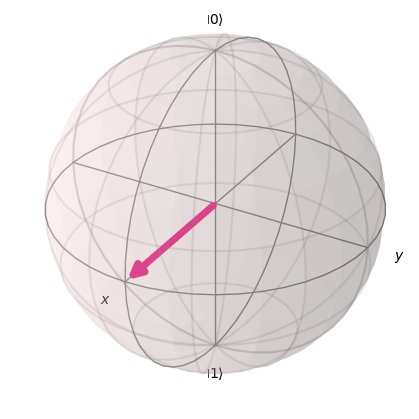

In [3]:
den_mat = density_matrix(psi)
print(den_mat)
plot_bloch_vector(qubit_bloch_vector(den_mat), figsize=(4,4))


How to distinguish it from the maximally mixed state? We check on expectation values of Pauli matrices

Mixed state with purity 0.5


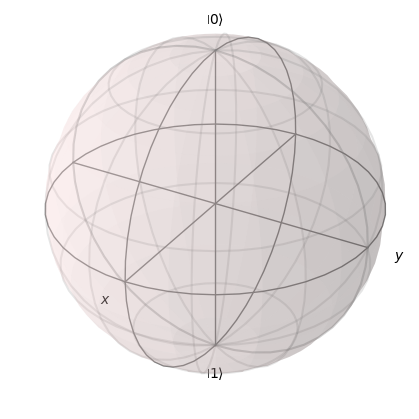

In [4]:
# MAXIMALLY MIXED STATE

sigma_x = np.array([[0,1],
                    [1,0]])
sigma_y = np.array([[0,-1j],
                    [1j,0]])
sigma_z = np.array([[1,0],
                    [0,-1]])

max_mixed_state = density_matrix_pauli(0,0,0)
_ = state_purity(max_mixed_state)
plot_bloch_vector(qubit_bloch_vector(max_mixed_state), figsize=(4,4))



In [5]:
ev_z1 = expectation_value(observable=sigma_z, rho=den_mat, debug=False)
ev_z2 = expectation_value(observable=sigma_z, rho=max_mixed_state, debug=False)
print("Expectation values:")
print("   sigmaZ")
print(f"      rho_c:{ev_z1}")
print(f"      rho_c:{ev_z2}")
print("   sigmaX")
ev_x1 = expectation_value(observable=sigma_x, rho=den_mat, debug=False)
ev_x2 = expectation_value(observable=sigma_x, rho=max_mixed_state, debug=False)
print(f"      rho_c:{ev_x1}")
print(f"      rho_c:{ev_x2}")


Expectation values:
   sigmaZ
      rho_c:0.0
      rho_c:0.0
   sigmaX
      rho_c:0.9999999999999998
      rho_c:0.0


# N-BODY EXAMPLES


In [6]:
psi_A_0, psi_A_1 = [1,0], [0,1] #basis A
psi_B_0, psi_B_1 = [1,0], [0,1] #basis B

### I. General pure state case
$$
 ∣\psi\rangle = \frac{1}{  \sqrt{2}}\left(∣00\rangle+∣01\rangle \right)
$$

In [7]:
general_state = np.kron(psi_A_0, psi_B_0) + np.kron(psi_A_0, psi_B_1)
general_state = normalize_vector(general_state)
general_state

array([0.70710678, 0.70710678, 0.        , 0.        ])

In [8]:
general_rho = density_matrix(general_state)
general_rho

array([[0.5, 0.5, 0. , 0. ],
       [0.5, 0.5, 0. , 0. ],
       [0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. ]])

----------------------------------------------------
DENSITY MATRIX TRACING SITES ([1])
----------------------------------------------------
[[1. 0.]
 [0. 0.]]
State is pure


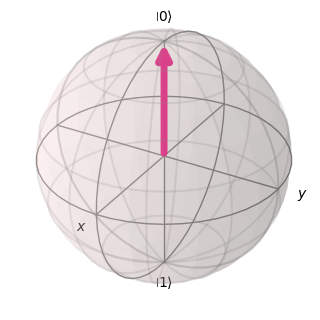

In [9]:
#Getting the reduced density matrix for each qubit
rho_A = get_reduced_density_matrix(general_state, D, N, keep_indices= [0], print_rho=True)
_ = state_purity(rho_A)
plot_bloch_vector(qubit_bloch_vector(rho_A), figsize=(3,3))


----------------------------------------------------
DENSITY MATRIX TRACING SITES ([0])
----------------------------------------------------
[[0.5 0.5]
 [0.5 0.5]]
State is pure


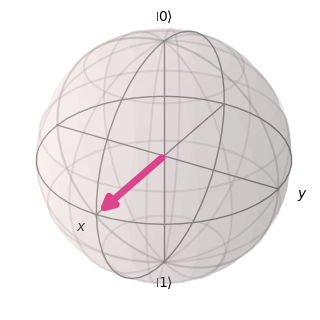

In [36]:
rho_B = get_reduced_density_matrix(general_state, D, N, keep_indices= [1], print_rho=True)
_ = state_purity(rho_B)
plot_bloch_vector(qubit_bloch_vector(rho_B), figsize=(3,3))

### II. Maximally entangle state case (Bell state)
$$
 ∣\psi\rangle = \frac{1}{  \sqrt{2}}\left(∣00\rangle+∣11\rangle \right)
$$

In [21]:
bell_state = normalize_vector(np.kron(psi_A_0,psi_B_0) + np.kron(psi_A_1, psi_B_1))
rho_bell = density_matrix(bell_state)
print(rho_bell)
_ = state_purity(rho_bell)

[[0.5 0.  0.  0.5]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0. ]
 [0.5 0.  0.  0.5]]
State is pure


----------------------------------------------------
DENSITY MATRIX TRACING SITES ([1])
----------------------------------------------------
[[0.5 0. ]
 [0.  0.5]]
Mixed state with purity 0.5


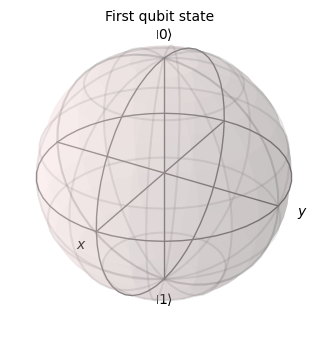

In [41]:
rho_bell_A = get_reduced_density_matrix(bell_state, D,N, keep_indices=[0], print_rho=True)
_ = state_purity(rho_bell_A)
plot_bloch_vector(qubit_bloch_vector(rho_bell_A), figsize=(3,3), title="First qubit state")
#TO SAVE FIG
#bloch_fig = plot_bloch_vector(qubit_bloch_vector(rho_bell_A), figsize=(3,3), title="First qubit state")
#bloch_fig.savefig("./plots/bell_state_A.svg", format='svg', bbox_inches='tight')  # Save as PNG file


In [ ]:
rho_bell_B = get_reduced_density_matrix(bell_state, D,N, keep_indices=[1], print_rho=True)
_ = state_purity(rho_bell_B)
plot_bloch_vector(qubit_bloch_vector(rho_bell_B), figsize=(3,3), title="Second qubit state")
#TO SAVE FIG
# bloch_fig = plot_bloch_vector(qubit_bloch_vector(rho_bell_B), figsize=(3,3), title="Second qubit state")
# bloch_fig.savefig("./plots/bell_state_B.svg", format='svg', bbox_inches='tight')  # Save as PNG file


----------------------------------------------------
DENSITY MATRIX TRACING SITES ([0])
----------------------------------------------------
[[0.5 0. ]
 [0.  0.5]]
Mixed state with purity 0.5


### III. Separable state case

In [42]:
separable_state = Nbody_separable_wfc(D,N,print_state=True)

[-0.26446844+0.30308058j -0.2661459 +0.13929188j -0.31464904+0.6173886j
 -0.38620166+0.34443914j]


In [43]:
rho_separable= density_matrix(separable_state)
print(rho_separable)
_ = state_purity(rho_separable)

[[0.16180139+6.17435131e-18j 0.11260385-4.38253484e-02j
  0.27033323+6.79157824e-02j 0.20653096-2.59569417e-02j]
 [0.11260385+4.38253484e-02j 0.09023587-1.65882484e-18j
  0.16973977+1.20487389e-01j 0.15076356+3.78763105e-02j]
 [0.27033323-6.79157824e-02j 0.16973977-1.20487389e-01j
  0.4801727 -1.23648919e-17j 0.33417078-1.30059055e-01j]
 [0.20653096+2.59569417e-02j 0.15076356-3.78763105e-02j
  0.33417078+1.30059055e-01j 0.26779004-5.30867425e-18j]]
State is pure


----------------------------------------------------
DENSITY MATRIX TRACING SITES ([1])
----------------------------------------------------
[[0.25203726+0.j         0.4210968 +0.10579209j]
 [0.4210968 -0.10579209j 0.74796274+0.j        ]]
State is pure


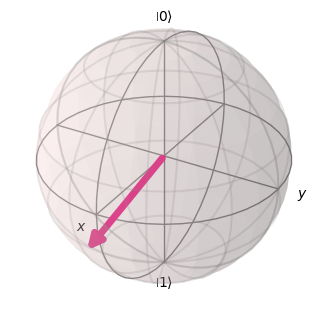

In [46]:
rho_separable_A = get_reduced_density_matrix(separable_state, D, N, keep_indices=[0], print_rho=True)
_ = state_purity(rho_separable_A)
plot_bloch_vector(qubit_bloch_vector(rho_separable_A), figsize=(3,3))
#TO SAVE FIG
#bloch_fig = plot_bloch_vector(qubit_bloch_vector(rho_separable_A), figsize=(3,3), title="First qubit state")
#bloch_fig.savefig("./plots/separable_A.svg", format='svg', bbox_inches='tight')  # Save as PNG file

----------------------------------------------------
DENSITY MATRIX TRACING SITES ([0])
----------------------------------------------------
[[0.64197409+0.j        0.44677463-0.1738844j]
 [0.44677463+0.1738844j 0.35802591+0.j       ]]
State is pure


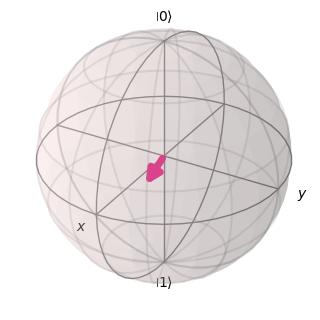

In [47]:
rho_separable_B = get_reduced_density_matrix(separable_state, D, N, keep_indices=[1],print_rho=True)
_ = state_purity(rho_separable_B)
plot_bloch_vector(qubit_bloch_vector(rho_separable_B), figsize=(3,3))
#TO SAVE FIG
#bloch_fig = plot_bloch_vector(qubit_bloch_vector(rho_separable_B), figsize=(3,3), title="Second qubit state")
#bloch_fig.savefig("./plots/separable_B.svg", format='svg', bbox_inches='tight')  # Save as PNG file



### IV. Mixed state

In [9]:
# Mixed state: 70% |01⟩ + 30% |10⟩
state_1, state_2 = np.kron(psi_A_0, psi_B_1), np.kron(psi_A_1, psi_B_0)
density_first_state, density_second_state = density_matrix(state_1), density_matrix(state_2) 
_ = state_purity(density_first_state)
_ = state_purity(density_second_state)

mixed_rho = 0.7 * density_first_state \
            + 0.3 * density_second_state
_ = state_purity(mixed_rho)
mixed_rho


State is pure
State is pure
Mixed state with purity 0.58


array([[0. , 0. , 0. , 0. ],
       [0. , 0.7, 0. , 0. ],
       [0. , 0. , 0.3, 0. ],
       [0. , 0. , 0. , 0. ]])

[[0.7 0. ]
 [0.  0.3]]
Mixed state with purity 0.58


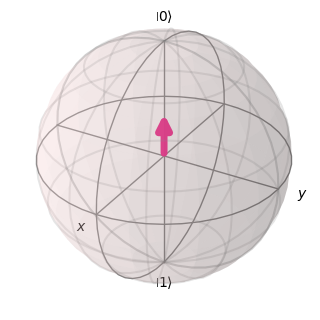

In [10]:
rho_mixed_A = get_reduced_density_matrix_from_density_matrix(mixed_rho,subsys_to_trace=1, display=True)
_ = state_purity(rho_mixed_A)
plot_bloch_vector(qubit_bloch_vector(rho_mixed_A), figsize=(3,3))

[[0.3 0. ]
 [0.  0.7]]
Mixed state with purity 0.58


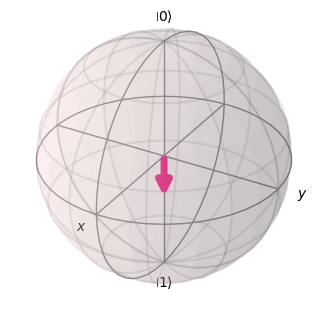

In [11]:
rho_mixed_B = get_reduced_density_matrix_from_density_matrix(mixed_rho,subsys_to_trace=0, display=True)
_ = state_purity(rho_mixed_B)
plot_bloch_vector(qubit_bloch_vector(rho_mixed_B), figsize=(3,3))